In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.cluster import MeanShift
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

In [2]:
binary_med_data = pd.read_csv('binary_med_data.csv',index_col='Unnamed: 0')
binary_level1 = pd.read_csv('bought_level1.csv',index_col='Unnamed: 0')
binary_level2 = pd.read_csv('bought_level2.csv',index_col='Unnamed: 0')
binary_level3 = pd.read_csv('bought_level3.csv',index_col='Unnamed: 0')
substance_vendor_data = pd.read_csv('substance_vendor_data.csv',index_col='Unnamed: 0')
substances_list = pd.read_csv('substances_list.csv',index_col='Unnamed: 0')
atc_descriptions = pd.read_csv('atc_descriptions.csv',index_col='Unnamed: 0')

In [3]:
binary_med_data.head()

,C07AB,C10AA,C09AA,A02BC,B01AC,C03CA,C08CA,A10BA,N02BE,A12BA,...,C05CA,N05CF,R01AA,A03AA,C09BB,A07DA,N06AX,A05AX,M01AC,bought_qty
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
binary_level1.head()

,C,A,B,N,M,R,G,H,D
0,0,0,0,2,1,1,0,0,0
1,1,1,0,0,1,0,0,0,0
2,3,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0


In [5]:
binary_level2.head()

,C07,C10,C09,A02,B01,C03,C08,A10,N02,A12,...,A05,N05,H03,A03,M03,A01,D08,C05,R01,A07
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
binary_level3.head()

,C07A,C10A,C09A,A02B,B01A,C03C,C08C,A10B,N02B,A12B,...,M03B,N06A,A01A,D08A,C05C,N05C,R01A,C09B,A07D,A05A
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
substance_vendor_data.head()

,Code,Name,Vendor
0,C07AB01,practolol,Mcule
1,C07AB01,practolol,Vitas-M Laboratory
2,C07AB01,practolol,"Chemieliva Pharmaceutical Co., Ltd"
3,C07AB01,practolol,MuseChem
4,C07AB01,practolol,AA BLOCKS


In [8]:
substances_list.rename(columns={"0": "name"},inplace=True)
substances_list.head()

,name
C07AB01,practolol
C07AB02,metoprolol
C07AB03,atenolol
C07AB04,acebutolol
C07AB05,betaxolol


In [9]:
atc_descriptions.rename(columns={"0": "name"},inplace=True)
atc_descriptions.head()

,name
C,cardiovascular system
A,alimentary tract and metabolism
B,blood and blood forming organs
N,nervous system
M,musculo-skeletal system


In [10]:
#Note: Now I will make a PCA for every dataframe

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=43)
binary_med_data_pca = pca.fit_transform(binary_med_data.drop(columns='bought_qty',axis=1))


print(pca.explained_variance_ratio_.sum())
print(binary_med_data_pca)
print(len(binary_med_data.columns)-1)

0.9547278783940644
[[-9.05305999e-01 -4.15864353e-02 -8.67624805e-02 ...  6.02595554e-01
   5.88632689e-01 -1.07857494e-01]
 [-3.14145279e-01  3.72284961e-01 -8.44239238e-02 ...  4.25624845e-02
  -2.17673847e-02  3.79503477e-03]
 [-1.92532677e-01 -5.79638247e-01 -5.84589121e-01 ... -4.87609714e-02
  -1.75666397e-02  1.88357164e-02]
 ...
 [-2.22685021e-02 -4.38815300e-01 -6.58699462e-01 ... -6.87655443e-04
  -2.34423222e-03 -1.56391063e-02]
 [-5.43452444e-01 -3.15807331e-01  8.21777845e-01 ... -4.75907858e-01
   2.99077478e-01  1.69370365e-01]
 [ 1.08196555e+00  2.19462930e-01  8.90566245e-01 ...  8.13790946e-02
  -4.24661473e-02 -3.04459684e-02]]
50


In [12]:
#To gain 95% ratio sum I need to create 43 n_components when there are 50
#so I will not use an PCA for binary_med_data

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
binary_level1_pca = pca.fit_transform(binary_level1)


print(pca.explained_variance_ratio_.sum())
print(binary_level1_pca)
print(len(binary_level1.columns))

0.9814633074795056
[[-2.19914528 -0.52380265  1.42470035  0.50390265  0.68668253  0.0771384 ]
 [-0.90071151  0.33993943 -0.52499995  0.6135787  -0.14329533 -0.17748669]
 [ 0.97237049 -0.94388392 -0.39504478 -0.2866431  -0.13921929 -0.30359133]
 ...
 [ 0.97237049 -0.94388392 -0.39504478 -0.2866431  -0.13921929 -0.30359133]
 [-1.74957583  1.47392637  0.44160724 -0.40619342 -0.28005083 -0.19985406]
 [ 2.13939265  0.92208592  0.60141487  0.73329846  0.20932782 -0.2766178 ]]
9


In [14]:
#The same

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=22)
binary_level2_pca = pca.fit_transform(binary_level2)


print(pca.explained_variance_ratio_.sum())
print(binary_level2_pca)
print(len(binary_level2.columns))

0.9553164132764596
[[-1.17824953 -0.15287056  0.27620741 ...  0.72686295 -0.3610978
   0.11284729]
 [-0.47450851 -0.20698525 -0.32909768 ... -0.05040811 -0.11589442
  -0.00345219]
 [ 0.5305577  -0.26059107  0.0647735  ... -0.05513331 -0.02308286
  -0.03072022]
 ...
 [ 0.26283357 -0.41041984  0.24644977 ... -0.05864182 -0.02436621
  -0.02332441]
 [-0.78111711 -0.18693641 -0.13003493 ...  0.72487454 -0.24588351
   0.06419265]
 [ 1.0271567  -1.4185254   0.97937447 ... -0.07608392 -0.02334493
  -0.03993107]]
28


In [16]:
#The same

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
binary_level3_pca = pca.fit_transform(binary_level3)


print(pca.explained_variance_ratio_.sum())
print(binary_level3_pca)
print(len(binary_level3.columns))

0.9531147989979962
[[-1.11046860e+00  7.34379195e-02 -6.06379641e-02 ... -8.62498942e-02
  -4.80264245e-02 -7.96543648e-03]
 [-2.39396120e-01 -7.29687764e-01  5.43050845e-01 ... -3.60634613e-02
  -2.05174868e-02 -3.27825481e-02]
 [ 2.70195481e-01  8.74129629e-02 -3.37374291e-01 ... -2.28563236e-02
  -3.72564429e-02 -1.75916989e-02]
 ...
 [-1.02133286e-01  7.09971305e-02 -3.11678292e-01 ... -3.81319751e-02
  -2.93162623e-02 -3.31003390e-02]
 [-6.12982845e-01 -6.00553939e-01  6.38412418e-01 ... -8.73230065e-02
   5.79520549e-04 -1.74407510e-02]
 [ 9.80266275e-01 -6.16564175e-01  2.82163631e-01 ...  2.01386980e-02
  -7.09869482e-02  4.89680201e-02]]
39


In [18]:
#The same

In [19]:
#So PCA is not needed

In [20]:
#The size of data is more than 120k and clustering for such a data is too hard to calculate. 
#So I must reduce it

In [21]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(binary_level2[:30000])
    Sum_of_squared_distances.append(km.inertia_)

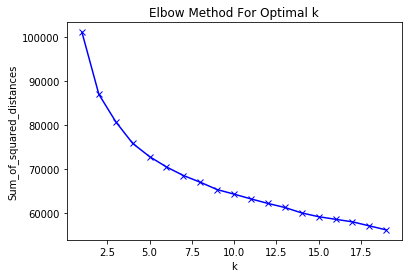

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
af = AffinityPropagation(preference=-100,damping=0.9)
af.fit(binary_level3[:10000])

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print(n_clusters_)
print(labels)

/home/ksawery/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning
/home/ksawery/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:247: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


0
[-1 -1 -1 ... -1 -1 -1]


In [24]:
af = MeanShift(n_jobs=-1,bandwidth=2,bin_seeding=True,min_bin_freq=.1)
af.fit(binary_level3)

labels = af.labels_

n_clusters_ = len(labels)

print(n_clusters_)
print(labels)

121170
[0 0 0 ... 0 0 0]


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


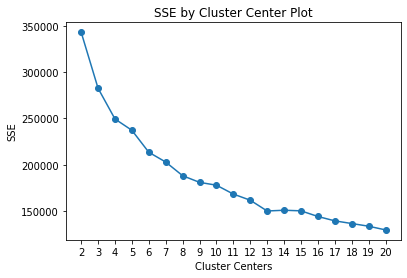

In [25]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k,
                                   init_size=1024,
                                   batch_size=2048,
                                   random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

find_optimal_clusters(binary_level1, 20)

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


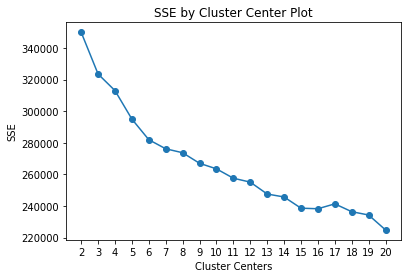

In [26]:
find_optimal_clusters(binary_level2, 20)

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


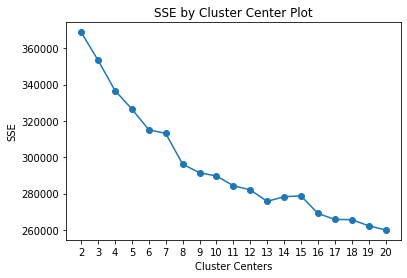

In [27]:
find_optimal_clusters(binary_level3, 20)